In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Часть 1

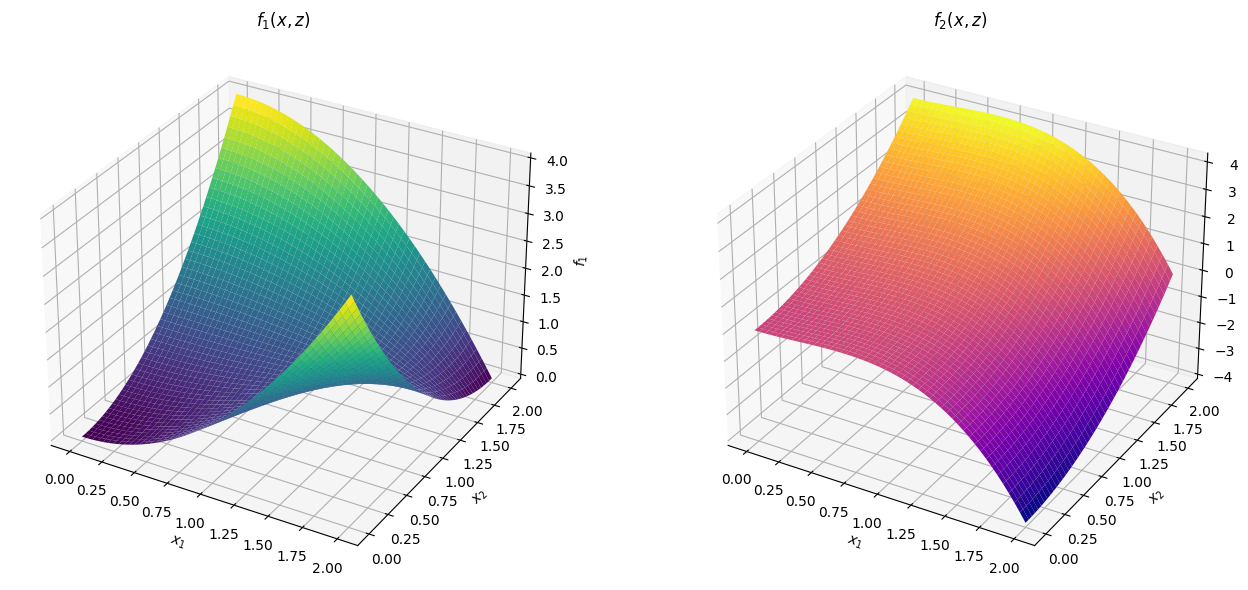

In [20]:
def f1_old(x1, x2, z1, z2):
    return x1**2 + x2**2 - x2 * (z1**2 - z2**2)

def f2_old(x1, x2, z1, z2):
    return x1**2 + x2**2 - x1 * (z1**2 + z2**2)

# сетка x1, x2
x1 = np.linspace(0, 2, 50)
x2 = np.linspace(0, 2, 50)
z1 = np.linspace(0, 2, 50)
z2 = np.linspace(0, 2, 50)

X1, X2 = np.meshgrid(x1, x2)
Z1, Z2 = np.meshgrid(z1, z2)

F1 = f1_old(X1, X2, Z1[0], Z2[0])
F2 = f2_old(X1, X2, Z1[0], Z2[0])

# 3D plot для f1
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, F1, cmap='viridis')
ax1.set_title('$f_1(x, z)$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f_1$')

# 3D plot для f2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, F2, cmap='plasma')
ax2.set_title('$f_2(x, z)$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f_2$')

plt.tight_layout()
plt.show()


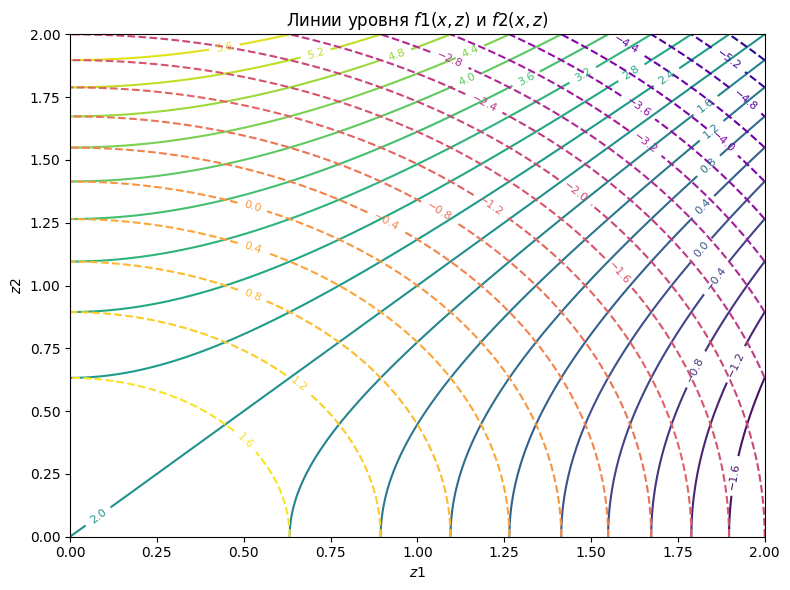

In [21]:
# Функции задержек f1 и f2
def f1(x1, x2, z1, z2):
    return x1**2 + x2**2 - x2 * (z1**2 - z2**2)

def f2(x1, x2, z1, z2):
    return x1**2 + x2**2 - x1 * (z1**2 + z2**2)

x1, x2 = 1, 1  # фиксированные значения

# Массивы значений z1 и z2
z1_vals = np.linspace(0, 2, 100)
z2_vals = np.linspace(0, 2, 100)
Z1, Z2 = np.meshgrid(z1_vals, z2_vals)

F1 = f1(x1, x2, Z1, Z2)
F2 = f2(x1, x2, Z1, Z2)

fig, ax1 = plt.subplots(figsize=(8, 6))

# Линии уровня для f1
contour1 = ax1.contour(Z1, Z2, F1, levels=20, cmap='viridis')
ax1.clabel(contour1, inline=True, fontsize=8)

# Линии уровня для f2
contour2 = ax1.contour(Z1, Z2, F2, levels=20, cmap='plasma', linestyles='dashed')
ax1.clabel(contour2, inline=True, fontsize=8)

ax1.set_title('Линии уровня $f1(x, z)$ и $f2(x, z)$')
ax1.set_xlabel('$z1$')
ax1.set_ylabel('$z2$')

plt.tight_layout()
plt.show()


График линий уровня, который мы строим, помогает визуализировать, как значения функций f1(x, z)  и f2(x, z)  изменяются в зависимости от переменных z1  и z2 , при фиксированных значениях x1  и x2 .

### Что на осях?

- **Ось X**  z1: Показывает возможные значения переменной z1  на интервале [0, 2].
- **Ось Y** z2: Показывает возможные значения переменной z2  на интервале [0, 2].

### Как строится график?

1. **Сетка значений**:
   - Сначала создаётся сетка значений для переменных z1  и z2  с помощью функции `np.meshgrid`. Это означает, что для каждого значения z1  мы рассматриваем все возможные значения z2  (и наоборот), создавая тем самым двумерное пространство.
   - Пример: если z1  и z2  меняются от 0 до 2 с шагом 0.02, мы получим сетку 100x100 точек.

2. **Вычисление значений функций**:
   - Для каждой точки на этой сетке мы вычисляем значения функций f1(x1, x2, z1, z2)  и f2(x1, x2, z1, z2) .
   - Результаты вычислений для всех точек на сетке записываются в двумерные массивы F1  и F2 .


Равновесие по Нэшу будет в точке, где линии уровня перпендикулярны

# Часть 2
(поменялись функции f1 и f2)

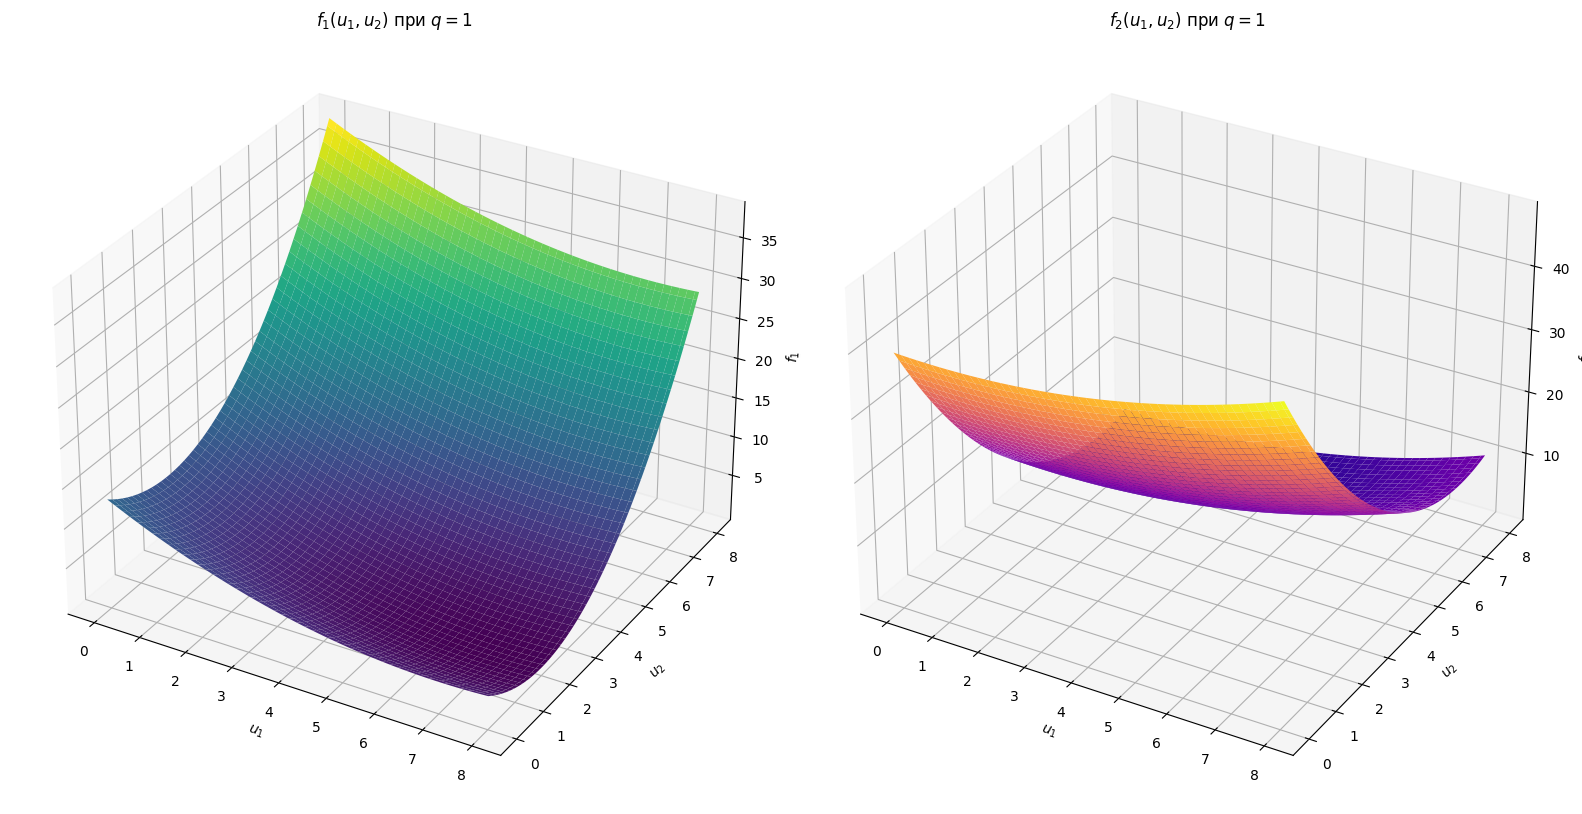

In [22]:
def v(q):
    return (q**2 * (q - 2)**2)

def f1(u1, u2, q=1):
    return 0.2 * (u1 - 7 * v(q))**2 + 0.8 * (u2 - 2 * v(q))**2

def f2(u1, u2, q=1):
    return 0.2 * (u1 - v(q))**2 + 0.8 * (u2 - 7 * v(q))**2

# Создаем сетку для u1 и u2 от 0 до 8
u1_vals = np.linspace(0, 8, 100)
u2_vals = np.linspace(0, 8, 100)
U1, U2 = np.meshgrid(u1_vals, u2_vals)

# Значения функций f1 и f2 для каждой точки сетки
F1 = f1(U1, U2)
F2 = f2(U1, U2)


# Построение 3D-графиков для f1 и f2
fig = plt.figure(figsize=(16, 8))

# График для f1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(U1, U2, F1, cmap='viridis')
ax1.set_title('$f_1(u_1, u_2)$ при $q=1$')
ax1.set_xlabel('$u_1$')
ax1.set_ylabel('$u_2$')
ax1.set_zlabel('$f_1$')

# График для f2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(U1, U2, F2, cmap='plasma')
ax2.set_title('$f_2(u_1, u_2)$ при $q=1$')
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax2.set_zlabel('$f_2$')

plt.tight_layout()
plt.show()


Построение линий уровня

In [23]:
# Определяем функцию v(q)
def v(q):
    return (q**2 * (q - 2)**2)

# Определяем функции f1 и f2
def f1_function(u1, u2, q=1):
    return 0.2 * (u1 - 7 * v(q))**2 + 0.8 * (u2 - 2 * v(q))**2

def f2_function(u1, u2, q=1):
    return 0.2 * (u1 - v(q))**2 + 0.8 * (u2 - 7 * v(q))**2

# Частные производные функций f1 и f2
def d_f1(u1, u2, q=1):
    return 7 * v(q)

def d_f2(u1, u2, q=1):
    return 7 * v(q)

In [24]:
# Сетка для u1 и u2 от 0 до 8
u1_vals = np.linspace(0, 8, 100)
u2_vals = np.linspace(0, 8, 100)
U1, U2 = np.meshgrid(u1_vals, u2_vals)

# Значения функций f1 и f2 для каждой точки сетки
F1 = f1_function(U1, U2)
F2 = f2_function(U1, U2)

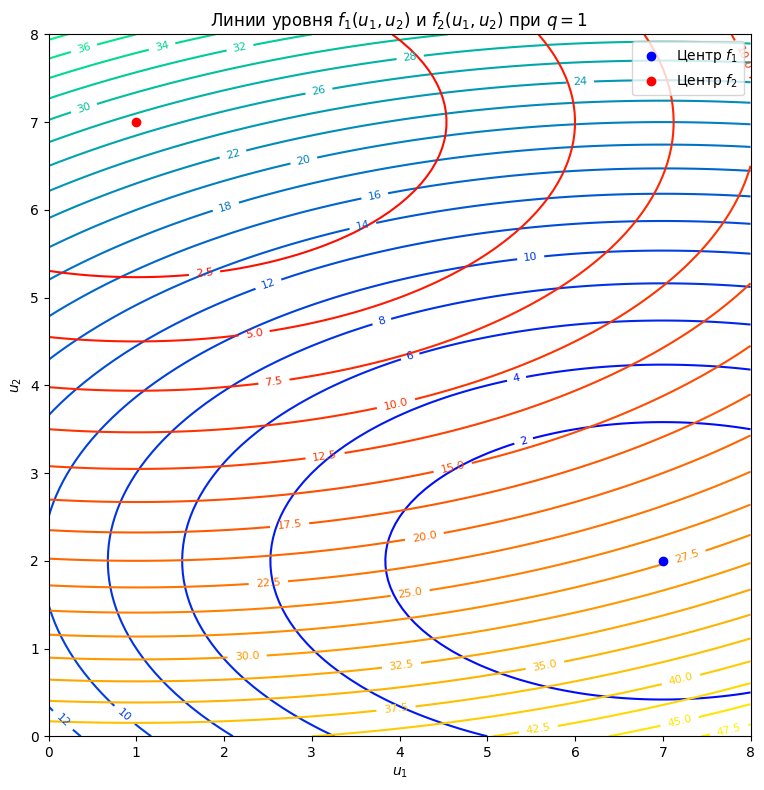

In [25]:
# Центры (посчитала аналитически)
center_f1 = (7, 2)  # минимум f1
center_f2 = (1, 7)  # минимум f2

fig, ax = plt.subplots(figsize=(8, 8))

# Линии уровня для f1
contour1 = ax.contour(U1, U2, F1, levels=20, cmap='winter')
ax.clabel(contour1, inline=True, fontsize=8)

# Линии уровня для f2
contour2 = ax.contour(U1, U2, F2, levels=20, cmap='autumn')
ax.clabel(contour2, inline=True, fontsize=8)

ax.scatter(*center_f1, color='blue', label='Центр $f_1$', zorder=5)  # Центр f1
ax.scatter(*center_f2, color='red', label='Центр $f_2$', zorder=5)   # Центр f2

ax.set_title('Линии уровня $f_1(u_1, u_2)$ и $f_2(u_1, u_2)$ при $q=1$')
ax.set_xlabel('$u_1$')
ax.set_ylabel('$u_2$')

# Сохраняем квадратную сетку
ax.set_aspect('equal')

# Легенда
ax.legend()

plt.tight_layout()
plt.show()


In [35]:
q_vals = np.arange(0.8, 1.6001, 0.02)

results = []

for q in q_vals:
    u1_nash = d_f1(U1, U2, q)
    u2_nash = d_f2(U1, U2, q)
    F1 = f1_function(u1_nash, u2_nash, q)
    F2 = f2_function(u1_nash, u2_nash, q)
    F0 = max(F1, F2)
    # break

    # Добавляем результаты в список
    results.append({'q': q, 'u1_Nash': u1_nash, 'u2_Nash': u2_nash,
                    'F1': F1, 'F2': F2, 'F0': F0})

# Преобразуем список в DataFrame
df = pd.DataFrame(results)

# Вывод таблицы
print(df)
print('\nРавновесие по Штакельбергу \n при 0.8 < q < 1.6 :')
print(df[df['F0'] == min(df['F0'])])

       q   u1_Nash   u2_Nash         F1        F2         F0
0   0.80  6.451200  6.451200  16.986931  6.115295  16.986931
1   0.82  6.553748  6.553748  17.531272  6.311258  17.531272
2   0.84  6.646188  6.646188  18.029310  6.490551  18.029310
3   0.86  6.728289  6.728289  18.477500  6.651900  18.477500
4   0.88  6.799852  6.799852  18.872645  6.794152  18.872645
5   0.90  6.860700  6.860700  19.211920  6.916291  19.211920
6   0.92  6.910687  6.910687  19.492894  7.017442  19.492894
7   0.94  6.949691  6.949691  19.713551  7.096879  19.713551
8   0.96  6.977618  6.977618  19.872307  7.154030  19.872307
9   0.98  6.994401  6.994401  19.968019  7.188487  19.968019
10  1.00  7.000000  7.000000  20.000000  7.200000  20.000000
11  1.02  6.994401  6.994401  19.968019  7.188487  19.968019
12  1.04  6.977618  6.977618  19.872307  7.154030  19.872307
13  1.06  6.949691  6.949691  19.713551  7.096879  19.713551
14  1.08  6.910687  6.910687  19.492894  7.017442  19.492894
15  1.10  6.860700  6.86